In [1]:
import numpy as np
import helper_od_yuan as helper
import od_lib_yuan as od
from itertools import combinations
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import csv

In [2]:
filename = "YuanInput.csv"

In [3]:
times, RA_vec, DEC_vec = helper.parse_custom_csv_input(filename)
sun_vectors = np.array([None])
print(times)
print(RA_vec)
print(DEC_vec)

[2460485.695 2460494.676 2460497.672 2460500.689 2460502.663]
[3.91391976 3.9083587  3.90922046 3.91146248 3.91366596]
[-0.26168061 -0.23990472 -0.23380237 -0.22825658 -0.22495064]


In [4]:
indicies = np.array([0, 1, 2, 3, 4])
comb = combinations(indicies, 3)
comb_list = list(comb)
comb_list = np.array(comb_list)

In [5]:
all_a910lc_elements = np.zeros((0,7))
for i in range(np.size(comb_list, 0)):
    temp_times = times[comb_list[i]]
    temp_RA_vec = RA_vec[comb_list[i]]
    temp_DEC_vec = DEC_vec[comb_list[i]]
    a910lc_vecs = od.GaussMethod(temp_RA_vec, temp_DEC_vec, temp_times, sun_vectors)
    position_vec, velocity_vec = a910lc_vecs.get_position_and_velocity()
    a910lc_od = od.OrbitalDetermination(position_vec, velocity_vec, times[1])
    a910lc_elements = a910lc_od.get_orbital_elements(use_radians = False)
    # keys = ["a", "e", "i", "Ω", "ω", "M", "T"]
    all_a910lc_elements = np.vstack((all_a910lc_elements, a910lc_elements))

In [6]:
true_all_a910lc_elements = all_a910lc_elements[:,:6] # wo 
print(true_all_a910lc_elements)

[[  2.62078006   0.41095769  15.30043862 242.49242851  91.3455869
  319.85571549]
 [  2.62043453   0.41111371  15.28615116 242.49779478  91.3352812
  319.88131939]
 [  2.61996642   0.41104221  15.28432682 242.49888609  91.34105671
  319.87062804]
 [  2.62006381   0.4112834   15.27256894 242.50300002  91.33031984
  320.60059135]
 [  2.61943873   0.41110573  15.27517461 242.50270757  91.3434097
  320.57364795]
 [  2.6185022    0.41084205  15.27880278 242.50242314  91.36213047
  321.23596004]
 [  2.61865424   0.41180342  15.23618296 242.5181747   91.34587291
  320.64898465]
 [  2.61753548   0.41128544  15.2507557  242.51428133  91.3734688
  320.57604941]
 [  2.61584238   0.41048192  15.27216426 242.50873231  91.4095888
  321.17054536]
 [  2.61413629   0.40966366  15.29251437 242.50372317  91.43958501
  321.06579767]]


In [7]:
# true_values = [2.612269855121786, .4099557226790182, 15.2974166959058, 242.5464403202016, 91.4775218652596, 33.35405646917018]
keys = ["a", "e", "i", "Ω", "ω", "M"]
middle_M_vals = [3.196440687638797E+02, 3.203428969158816E+02, 3.210466240227527E+02]
rel_diff_arr = []
for i in range(np.size(true_all_a910lc_elements, 0)):
    print(f"COMBINATION #{i+1}: {comb_list[i]}")
    true_values = [2.612269855121786, .4099557226790182, 15.2974166959058, 242.5464403202016, 91.4775218652596]
    true_values.append(middle_M_vals[comb_list[i][1]-1])
    rel_diff_arr.append(helper.usr_orbit_element_errors(true_all_a910lc_elements[i], true_values, keys))

COMBINATION #1: [0 1 2]
1: Element a || Rel Diff: 0.326% || Abs Diff: 0.009
2: Element e || Rel Diff: 0.244% || Abs Diff: 0.001
3: Element i || Rel Diff: 0.02% || Abs Diff: 0.003
4: Element Ω || Rel Diff: 0.022% || Abs Diff: 0.054
5: Element ω || Rel Diff: 0.144% || Abs Diff: 0.132
6: Element M || Rel Diff: 0.066% || Abs Diff: 0.212
COMBINATION #2: [0 1 3]
1: Element a || Rel Diff: 0.313% || Abs Diff: 0.008
2: Element e || Rel Diff: 0.282% || Abs Diff: 0.001
3: Element i || Rel Diff: 0.074% || Abs Diff: 0.011
4: Element Ω || Rel Diff: 0.02% || Abs Diff: 0.049
5: Element ω || Rel Diff: 0.155% || Abs Diff: 0.142
6: Element M || Rel Diff: 0.074% || Abs Diff: 0.237
COMBINATION #3: [0 1 4]
1: Element a || Rel Diff: 0.295% || Abs Diff: 0.008
2: Element e || Rel Diff: 0.265% || Abs Diff: 0.001
3: Element i || Rel Diff: 0.086% || Abs Diff: 0.013
4: Element Ω || Rel Diff: 0.02% || Abs Diff: 0.048
5: Element ω || Rel Diff: 0.149% || Abs Diff: 0.136
6: Element M || Rel Diff: 0.071% || Abs Diff: 0

In [8]:
print(rel_diff_arr)

[0.008226500772057405, 0.009184329698175477, 0.008848902228640267, 0.010439176585007441, 0.009370188990858105, 0.0077972626334011025, 0.013465120001385856, 0.010307418242073119, 0.005585995219850569, 0.0023979317838517147]


In [9]:
min_index = rel_diff_arr.index(min(rel_diff_arr))
print(min_index)

9


In [10]:
# BEST COMBINATION:
print(comb_list[min_index])

[2 3 4]


In [11]:
best_times = times[comb_list[min_index]]
best_RA_vec = RA_vec[comb_list[min_index]]
best_DEC_vec = DEC_vec[comb_list[min_index]]
print(best_times)
print(best_RA_vec)
print(best_DEC_vec)

[2460497.672 2460500.689 2460502.663]
[3.90922046 3.91146248 3.91366596]
[-0.23380237 -0.22825658 -0.22495064]


In [12]:
table76 = fits.open("corr76.fits")[1].data
table79 = fits.open("corr79.fits")[1].data
table711 = fits.open("corr711.fits")[1].data

In [13]:
"""
dtype=(numpy.record, [('field_x', '>f8'), ('field_y', '>f8'),
('field_ra', '>f8'), ('field_dec', '>f8'), ('index_x', '>f8'),
('index_y', '>f8'), ('index_ra', '>f8'), ('index_dec', '>f8'),
('index_id', '>i4'), ('field_id', '>i4'), ('match_weight',
'>f8'), ('FLUX', '>f4'), ('BACKGROUND', ‘>f4')]))
"""

"\ndtype=(numpy.record, [('field_x', '>f8'), ('field_y', '>f8'),\n('field_ra', '>f8'), ('field_dec', '>f8'), ('index_x', '>f8'),\n('index_y', '>f8'), ('index_ra', '>f8'), ('index_dec', '>f8'),\n('index_id', '>i4'), ('field_id', '>i4'), ('match_weight',\n'>f8'), ('FLUX', '>f4'), ('BACKGROUND', ‘>f4')]))\n"

In [14]:
def calc_uncertainty_corr(table):
    resids_ra = 0
    resids_dec = 0
    for i in range(int(table.shape[0])):
        # expected (field) and measured (index) values
        resids_ra += (table.index_ra[i] - table.field_ra[i])**2
        resids_dec += (table.index_dec[i] - table.field_dec[i])**2
    unc_ra = np.sqrt((resids_ra)/(int(table.shape[0])))
    unc_dec = np.sqrt((resids_dec)/(int(table.shape[0])))
    return unc_ra, unc_dec

In [15]:
uncert_ra_1, uncert_dec_1 = calc_uncertainty_corr(table76)
uncert_ra_2, uncert_dec_2 = calc_uncertainty_corr(table79)
uncert_ra_3, uncert_dec_3 = calc_uncertainty_corr(table711)

In [16]:
uncert_ra = np.array([uncert_ra_1, uncert_ra_2, uncert_ra_3])
uncert_dec = np.array([uncert_dec_1, uncert_dec_2, uncert_dec_3])
true_uncert = (((sum(uncert_ra)/len(uncert_ra)) + ((sum(uncert_dec)/len(uncert_dec))))/2)*(np.pi/180)

In [17]:
sun_vectors = np.empty((0,3))
for i in range(best_times.shape[0]):
    sun_vectors = np.vstack([sun_vectors, helper.get_sun_earth_vector(best_times[i])])

In [18]:

def monte_carlo_sim(num_iterations, best_times, best_RA_vec, best_DEC_vec, true_uncert, sun_vectors):
    
    random_ra_1_vec = np.random.normal(best_RA_vec[0], true_uncert, num_iterations)
    random_ra_2_vec = np.random.normal(best_RA_vec[1], true_uncert, num_iterations)
    random_ra_3_vec = np.random.normal(best_RA_vec[2], true_uncert, num_iterations)
    random_dec_1_vec = np.random.normal(best_DEC_vec[0], true_uncert, num_iterations)
    random_dec_2_vec = np.random.normal(best_DEC_vec[1], true_uncert, num_iterations)
    random_dec_3_vec = np.random.normal(best_DEC_vec[2], true_uncert, num_iterations)
    
    master_orbit_elements = np.zeros((0,7))
    for i in range(num_iterations):
        if i % 1000 == 0:
            print(f"Epoch: {i} out of {num_iterations} --- Percent Done: {(i/num_iterations)*100}%")
        temp_times = best_times
        temp_RA_vec = np.array([random_ra_1_vec[i], random_ra_2_vec[i], random_ra_3_vec[i]]).astype(np.float64)
        temp_DEC_vec = np.array([random_dec_1_vec[i], random_dec_2_vec[i], random_dec_3_vec[i]]).astype(np.float64)
        
        try:
            a910lc_vecs = od.GaussMethod(temp_RA_vec, temp_DEC_vec, temp_times, sun_vectors)
            position_vec, velocity_vec = a910lc_vecs.get_position_and_velocity(use_ecliptic=True)
            a910lc_od = od.OrbitalDetermination(position_vec, velocity_vec, temp_times[1])
            a910lc_elements = a910lc_od.get_orbital_elements(use_radians=False)
            
            master_orbit_elements = np.vstack((master_orbit_elements, a910lc_elements))
        except Exception as e:
            print(f"Exception occurred: {str(e)}")
            continue
        
    return master_orbit_elements


In [24]:
%%time
NUM_ITERATIONS = int(1e6)
master_orbit_elements = monte_carlo_sim(NUM_ITERATIONS, best_times, best_RA_vec, best_DEC_vec, true_uncert, sun_vectors)

Epoch: 0 out of 1000000 --- Percent Done: 0.0%
Epoch: 1000 out of 1000000 --- Percent Done: 0.1%
Epoch: 2000 out of 1000000 --- Percent Done: 0.2%
Epoch: 3000 out of 1000000 --- Percent Done: 0.3%
Epoch: 4000 out of 1000000 --- Percent Done: 0.4%
Epoch: 5000 out of 1000000 --- Percent Done: 0.5%
Epoch: 6000 out of 1000000 --- Percent Done: 0.6%
Epoch: 7000 out of 1000000 --- Percent Done: 0.7000000000000001%
Epoch: 8000 out of 1000000 --- Percent Done: 0.8%
Epoch: 9000 out of 1000000 --- Percent Done: 0.8999999999999999%
Epoch: 10000 out of 1000000 --- Percent Done: 1.0%
Epoch: 11000 out of 1000000 --- Percent Done: 1.0999999999999999%
Epoch: 12000 out of 1000000 --- Percent Done: 1.2%
Epoch: 13000 out of 1000000 --- Percent Done: 1.3%
Epoch: 14000 out of 1000000 --- Percent Done: 1.4000000000000001%
Epoch: 15000 out of 1000000 --- Percent Done: 1.5%
Epoch: 16000 out of 1000000 --- Percent Done: 1.6%
Epoch: 17000 out of 1000000 --- Percent Done: 1.7000000000000002%
Epoch: 18000 out of 

Epoch: 147000 out of 1000000 --- Percent Done: 14.7%
Epoch: 148000 out of 1000000 --- Percent Done: 14.799999999999999%
Epoch: 149000 out of 1000000 --- Percent Done: 14.899999999999999%
Epoch: 150000 out of 1000000 --- Percent Done: 15.0%
Epoch: 151000 out of 1000000 --- Percent Done: 15.1%
Epoch: 152000 out of 1000000 --- Percent Done: 15.2%
Epoch: 153000 out of 1000000 --- Percent Done: 15.299999999999999%
Epoch: 154000 out of 1000000 --- Percent Done: 15.4%
Epoch: 155000 out of 1000000 --- Percent Done: 15.5%
Epoch: 156000 out of 1000000 --- Percent Done: 15.6%
Epoch: 157000 out of 1000000 --- Percent Done: 15.7%
Epoch: 158000 out of 1000000 --- Percent Done: 15.8%
Epoch: 159000 out of 1000000 --- Percent Done: 15.9%
Epoch: 160000 out of 1000000 --- Percent Done: 16.0%
Epoch: 161000 out of 1000000 --- Percent Done: 16.1%
Epoch: 162000 out of 1000000 --- Percent Done: 16.2%
Epoch: 163000 out of 1000000 --- Percent Done: 16.3%
Epoch: 164000 out of 1000000 --- Percent Done: 16.4000000

Epoch: 292000 out of 1000000 --- Percent Done: 29.2%
Epoch: 293000 out of 1000000 --- Percent Done: 29.299999999999997%
Epoch: 294000 out of 1000000 --- Percent Done: 29.4%
Epoch: 295000 out of 1000000 --- Percent Done: 29.5%
Epoch: 296000 out of 1000000 --- Percent Done: 29.599999999999998%
Epoch: 297000 out of 1000000 --- Percent Done: 29.7%
Epoch: 298000 out of 1000000 --- Percent Done: 29.799999999999997%
Epoch: 299000 out of 1000000 --- Percent Done: 29.9%
Epoch: 300000 out of 1000000 --- Percent Done: 30.0%
Epoch: 301000 out of 1000000 --- Percent Done: 30.099999999999998%
Epoch: 302000 out of 1000000 --- Percent Done: 30.2%
Epoch: 303000 out of 1000000 --- Percent Done: 30.3%
Epoch: 304000 out of 1000000 --- Percent Done: 30.4%
Epoch: 305000 out of 1000000 --- Percent Done: 30.5%
Epoch: 306000 out of 1000000 --- Percent Done: 30.599999999999998%
Epoch: 307000 out of 1000000 --- Percent Done: 30.7%
Epoch: 308000 out of 1000000 --- Percent Done: 30.8%
Epoch: 309000 out of 1000000 

Epoch: 439000 out of 1000000 --- Percent Done: 43.9%
Epoch: 440000 out of 1000000 --- Percent Done: 44.0%
Epoch: 441000 out of 1000000 --- Percent Done: 44.1%
Epoch: 442000 out of 1000000 --- Percent Done: 44.2%
Epoch: 443000 out of 1000000 --- Percent Done: 44.3%
Epoch: 444000 out of 1000000 --- Percent Done: 44.4%
Epoch: 445000 out of 1000000 --- Percent Done: 44.5%
Epoch: 446000 out of 1000000 --- Percent Done: 44.6%
Epoch: 447000 out of 1000000 --- Percent Done: 44.7%
Epoch: 448000 out of 1000000 --- Percent Done: 44.800000000000004%
Epoch: 449000 out of 1000000 --- Percent Done: 44.9%
Epoch: 450000 out of 1000000 --- Percent Done: 45.0%
Epoch: 451000 out of 1000000 --- Percent Done: 45.1%
Epoch: 452000 out of 1000000 --- Percent Done: 45.2%
Epoch: 453000 out of 1000000 --- Percent Done: 45.300000000000004%
Epoch: 454000 out of 1000000 --- Percent Done: 45.4%
Epoch: 455000 out of 1000000 --- Percent Done: 45.5%
Epoch: 456000 out of 1000000 --- Percent Done: 45.6%
Epoch: 457000 out 

Epoch: 582000 out of 1000000 --- Percent Done: 58.199999999999996%
Epoch: 583000 out of 1000000 --- Percent Done: 58.3%
Epoch: 584000 out of 1000000 --- Percent Done: 58.4%
Epoch: 585000 out of 1000000 --- Percent Done: 58.5%
Epoch: 586000 out of 1000000 --- Percent Done: 58.599999999999994%
Epoch: 587000 out of 1000000 --- Percent Done: 58.699999999999996%
Epoch: 588000 out of 1000000 --- Percent Done: 58.8%
Epoch: 589000 out of 1000000 --- Percent Done: 58.9%
Epoch: 590000 out of 1000000 --- Percent Done: 59.0%
Epoch: 591000 out of 1000000 --- Percent Done: 59.099999999999994%
Epoch: 592000 out of 1000000 --- Percent Done: 59.199999999999996%
Epoch: 593000 out of 1000000 --- Percent Done: 59.3%
Epoch: 594000 out of 1000000 --- Percent Done: 59.4%
Epoch: 595000 out of 1000000 --- Percent Done: 59.5%
Epoch: 596000 out of 1000000 --- Percent Done: 59.599999999999994%
Epoch: 597000 out of 1000000 --- Percent Done: 59.699999999999996%
Epoch: 598000 out of 1000000 --- Percent Done: 59.8%
E

Epoch: 728000 out of 1000000 --- Percent Done: 72.8%
Epoch: 729000 out of 1000000 --- Percent Done: 72.89999999999999%
Epoch: 730000 out of 1000000 --- Percent Done: 73.0%
Epoch: 731000 out of 1000000 --- Percent Done: 73.1%
Epoch: 732000 out of 1000000 --- Percent Done: 73.2%
Epoch: 733000 out of 1000000 --- Percent Done: 73.3%
Epoch: 734000 out of 1000000 --- Percent Done: 73.4%
Epoch: 735000 out of 1000000 --- Percent Done: 73.5%
Epoch: 736000 out of 1000000 --- Percent Done: 73.6%
Epoch: 737000 out of 1000000 --- Percent Done: 73.7%
Epoch: 738000 out of 1000000 --- Percent Done: 73.8%
Epoch: 739000 out of 1000000 --- Percent Done: 73.9%
Epoch: 740000 out of 1000000 --- Percent Done: 74.0%
Epoch: 741000 out of 1000000 --- Percent Done: 74.1%
Epoch: 742000 out of 1000000 --- Percent Done: 74.2%
Epoch: 743000 out of 1000000 --- Percent Done: 74.3%
Epoch: 744000 out of 1000000 --- Percent Done: 74.4%
Epoch: 745000 out of 1000000 --- Percent Done: 74.5%
Epoch: 746000 out of 1000000 --- 

Epoch: 877000 out of 1000000 --- Percent Done: 87.7%
Epoch: 878000 out of 1000000 --- Percent Done: 87.8%
Epoch: 879000 out of 1000000 --- Percent Done: 87.9%
Epoch: 880000 out of 1000000 --- Percent Done: 88.0%
Epoch: 881000 out of 1000000 --- Percent Done: 88.1%
Epoch: 882000 out of 1000000 --- Percent Done: 88.2%
Epoch: 883000 out of 1000000 --- Percent Done: 88.3%
Epoch: 884000 out of 1000000 --- Percent Done: 88.4%
Epoch: 885000 out of 1000000 --- Percent Done: 88.5%
Epoch: 886000 out of 1000000 --- Percent Done: 88.6%
Epoch: 887000 out of 1000000 --- Percent Done: 88.7%
Epoch: 888000 out of 1000000 --- Percent Done: 88.8%
Epoch: 889000 out of 1000000 --- Percent Done: 88.9%
Epoch: 890000 out of 1000000 --- Percent Done: 89.0%
Epoch: 891000 out of 1000000 --- Percent Done: 89.1%
Epoch: 892000 out of 1000000 --- Percent Done: 89.2%
Epoch: 893000 out of 1000000 --- Percent Done: 89.3%
Epoch: 894000 out of 1000000 --- Percent Done: 89.4%
Epoch: 895000 out of 1000000 --- Percent Done:

In [25]:
print(master_orbit_elements)

[[2.46890988e+00 3.77209699e-01 1.54069094e+01 ... 9.44564796e+01
  3.15644119e+02 2.45925832e+06]
 [2.57242932e+00 3.98034168e-01 1.54338892e+01 ... 9.22405948e+01
  3.19338847e+02 2.45916390e+06]
 [2.87210016e+00 4.62136843e-01 1.50664940e+01 ... 8.77684196e+01
  3.28299585e+02 2.45887938e+06]
 ...
 [2.59284487e+00 4.08626127e-01 1.51512069e+01 ... 9.17823728e+01
  3.20766846e+02 2.45914191e+06]
 [2.59855257e+00 4.05530900e-01 1.53383128e+01 ... 9.17125484e+01
  3.20465417e+02 2.45913870e+06]
 [2.53677454e+00 3.93217042e-01 1.53305142e+01 ... 9.29183363e+01
  3.18407314e+02 2.45919541e+06]]


In [26]:
true_master_orbit_elements = master_orbit_elements[:,:6]

In [28]:
np.savetxt("montecarlo_1.csv", true_master_orbit_elements, delimiter=",")

In [29]:
# keys = ["a", "e", "i", "Ω", "ω", "M"]

In [30]:
true_anomalies = true_master_orbit_elements[:,0]
true_eccentricities = true_master_orbit_elements[:,1]
true_inclination = true_master_orbit_elements[:,2]
true_ascnode = true_master_orbit_elements[:,3]
true_periarg = true_master_orbit_elements[:,4]
true_ma = true_master_orbit_elements[:,5]

In [31]:
true_values = [2.612269855121786, .4099557226790182, 15.2974166959058, 242.5464403202016, 91.4775218652596, 3.210466240227527E+02]

0.12190603199708289


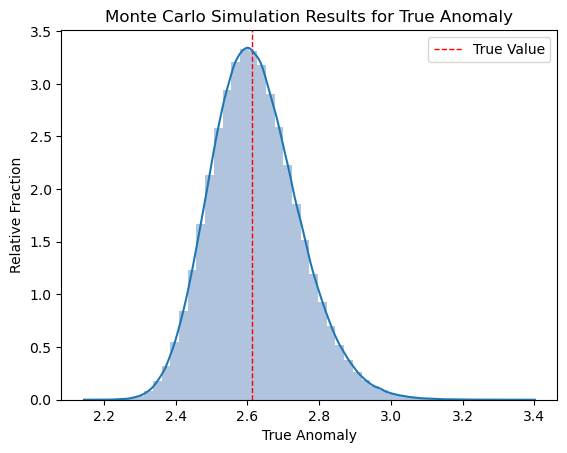

In [34]:
mu = true_values[0]
_, std = norm.fit(true_anomalies)
print(std)

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(true_anomalies, color = "lightsteelblue", density = True, bins = 50)

sns.kdeplot(data=true_anomalies)

plt.xlabel('True Anomaly')
plt.ylabel('Relative Fraction')
plt.legend(["True Value"])

plt.title('Monte Carlo Simulation Results for True Anomaly')
plt.show()

In [33]:
np.std(true_anomalies)

0.12190603199708289

0.0270491822738835


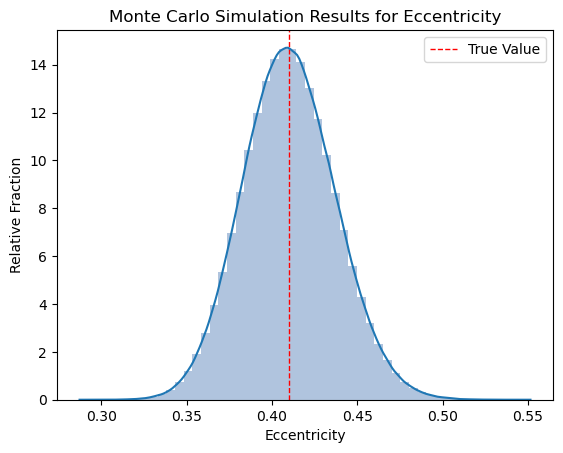

In [35]:

mu = true_values[1]
_, std = norm.fit(true_eccentricities)
print(std)

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(true_eccentricities, color = "lightsteelblue", density = True, bins = 50)

sns.kdeplot(data=true_eccentricities)

plt.xlabel('Eccentricity')
plt.ylabel('Relative Fraction')
plt.legend(["True Value"])

plt.title('Monte Carlo Simulation Results for Eccentricity')
plt.show()

0.18673576154283097


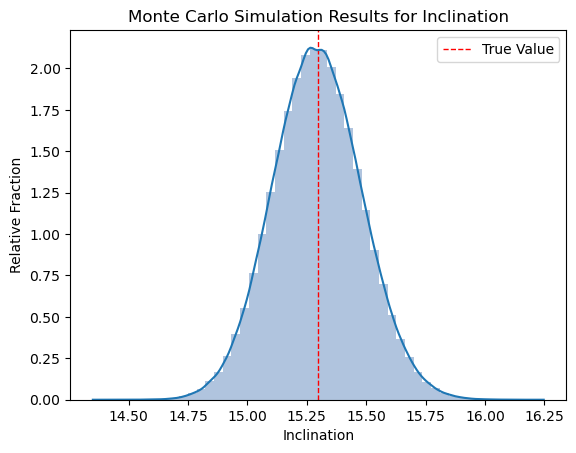

In [36]:
mu = true_values[2]
_, std = norm.fit(true_inclination)
print(std)

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(true_inclination, color = "lightsteelblue", density = True, bins = 50)

sns.kdeplot(data=true_inclination)

plt.xlabel('Inclination')
plt.ylabel('Relative Fraction')
plt.legend(["True Value"])

plt.title('Monte Carlo Simulation Results for Inclination')
plt.show()

0.12487516710531356


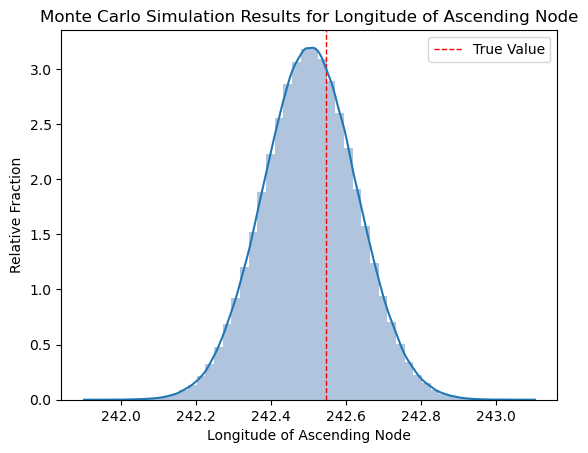

In [37]:


mu = true_values[3]
_, std = norm.fit(true_ascnode)
print(std)

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(true_ascnode, color = "lightsteelblue", density = True, bins = 50)

sns.kdeplot(data=true_ascnode)

plt.xlabel('Longitude of Ascending Node')
plt.ylabel('Relative Fraction')
plt.legend(["True Value"])

plt.title('Monte Carlo Simulation Results for Longitude of Ascending Node')
plt.show()

In [38]:
np.std(true_ascnode)

0.12487516710531356

2.185651532349311


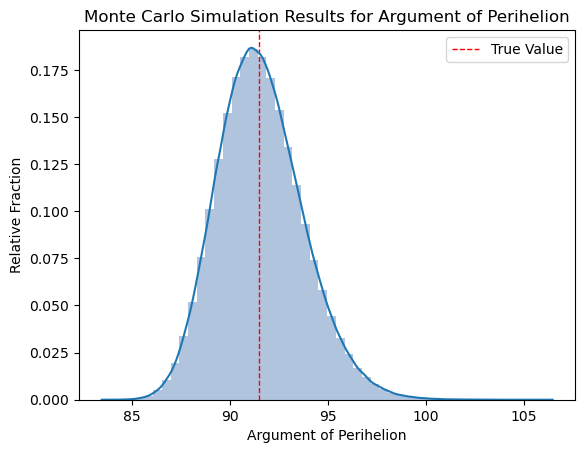

In [40]:

mu = true_values[4]
_, std = norm.fit(true_periarg)
print(std)

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(true_periarg, color = "lightsteelblue", density = True, bins = 50)

sns.kdeplot(data=true_periarg)

plt.xlabel('Argument of Perihelion')
plt.ylabel('Relative Fraction')
plt.legend(["True Value"])

plt.title('Monte Carlo Simulation Results for Argument of Perihelion')
plt.show()

4.1494024651074595


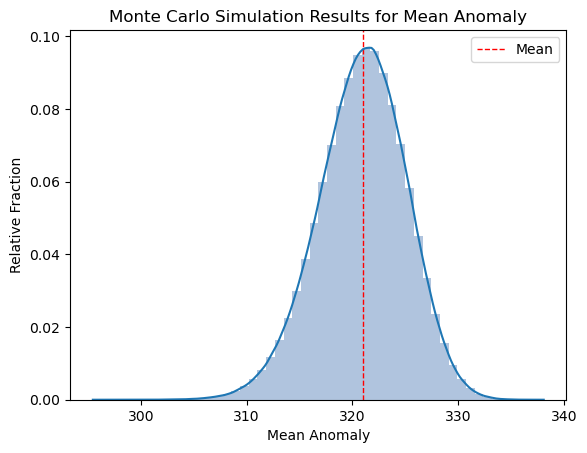

In [41]:

mu = true_values[5]
_, std = norm.fit(true_ma)
print(std)

plt.axvline(x=mu, color='red', linestyle='--', linewidth=1)

plt.hist(true_ma, color = "lightsteelblue", density = True, bins = 50)

sns.kdeplot(data=true_ma)

plt.xlabel('Mean Anomaly')
plt.ylabel('Relative Fraction')
plt.legend(["Mean"])

plt.title('Monte Carlo Simulation Results for Mean Anomaly')
plt.show()

In [27]:
num_iterations = 100

random_ra_1_vec = np.random.normal(best_RA_vec[0], true_uncert, num_iterations)
random_ra_2_vec = np.random.normal(best_RA_vec[1], new_uncert, num_iterations)
random_ra_3_vec = np.random.normal(best_RA_vec[2], new_uncert, num_iterations)
random_dec_1_vec = np.random.normal(best_DEC_vec[0], new_uncert, num_iterations)
random_dec_2_vec = np.random.normal(best_DEC_vec[1], new_uncert, num_iterations)
random_dec_3_vec = np.random.normal(best_DEC_vec[2], new_uncert, num_iterations)

print(random_ra_1_vec)

master_orbit_elements = np.zeros((0,7))
for i in range(num_iterations):
    temp_times = best_times
    temp_RA_vec = np.array([random_ra_1_vec[i], random_ra_2_vec[i], random_ra_3_vec[i]]).astype(np.float64)
    temp_DEC_vec = np.array([random_dec_1_vec[i], random_dec_2_vec[i], random_dec_3_vec[i]]).astype(np.float64)
    
#     temp_RA_vec = best_RA_vec
#     temp_DEC_vec = best_DEC_vec
    
    print(temp_RA_vec)
    print(temp_RA_vec.shape)
    print(temp_DEC_vec)
    print(temp_DEC_vec.shape)
    
#     print(f"true ra val:{best_RA_vec}")
#     print(f"true ra val:{best_DEC_vec}")
#     print(best_RA_vec.shape)
#     print(best_DEC_vec.shape)
    # print(temp_RA_vec)
    # print(temp_DEC_vec)
    a910lc_vecs = od.GaussMethod(temp_RA_vec, temp_DEC_vec, temp_times, sun_vectors)
    position_vec, velocity_vec = a910lc_vecs.get_position_and_velocity(use_ecliptic = True)
    
    print(position_vec, velocity_vec)

    a910lc_od = od.OrbitalDetermination(position_vec, velocity_vec, temp_times[1])
    a910lc_elements = a910lc_od.get_orbital_elements(use_radians = False)
# keys = ["a", "e", "i", "Ω", "ω", "M", "T"]
    master_orbit_elements = np.vstack((master_orbit_elements, a910lc_elements))
    
print(master_orbit_elements)

[3.92049987 4.27979947 4.03077026 3.88370035 3.33754987 4.19321418
 3.90521106 3.65383209 4.07483746 4.23188078 4.24677941 4.3478624
 4.31850342 3.55898253 3.1634324  3.89359849 4.26409694 3.29534163
 3.68072989 4.60726552 4.36078815 4.62034984 4.30695748 3.30549494
 4.25513669 3.84912094 3.82615666 3.7147796  4.27751278 4.28676736
 4.55285417 3.66718247 3.94434094 3.86951587 3.19951511 3.84089589
 4.3587262  4.500481   4.58912689 3.80410829 3.31671262 4.61404724
 4.09953902 4.06174414 3.61506804 4.45809344 4.13975775 4.21914852
 3.70727689 4.35333149 4.34582299 3.70830974 4.31582061 3.94286422
 4.3742655  3.58945467 2.949227   5.02338935 3.3521121  3.62160439
 3.48295927 3.53109174 4.42348325 3.67706144 3.21445452 3.0957375
 3.97078743 3.85967879 4.13435898 4.37611872 3.58703874 4.49071752
 3.95025103 4.02965825 3.19934434 3.74693348 3.29466065 3.25045078
 3.59572876 4.02492478 3.99877008 3.86281042 4.23997809 3.64044752
 4.12105552 4.1370798  3.94047637 3.64241476 3.63955535 4.343588

[[-0.34267346 -0.32051967 -0.88308666]
 [-0.98468492  0.17410099  0.00918979]
 [-0.35515562 -0.613914    0.70496389]]
[[-0.34267346 -0.32051967 -0.88308666]
 [-0.98468492  0.17410099  0.00918979]
 [-0.35515562 -0.613914    0.70496389]]
[ 0.29953223 -0.89139977 -0.3864139 ] [0.93976638 0.26713133 0.11586868]
[ 0.29953154 -0.89139965 -0.3864139 ] [0.93977184 0.26712701 0.11589355]
[ 0.29953154 -0.89139965 -0.3864139 ] [0.93977184 0.26712701 0.11589353]
[ 0.29953154 -0.89139965 -0.3864139 ] [0.93977184 0.26712701 0.11589353]
[ 2.99531543e-01 -9.71549809e-01  1.85311834e-05] [9.39771836e-01 2.91184036e-01 8.28238198e-05]
[4.26409694 3.63104715 3.5954937 ]
(3,)
[-0.33981566 -0.2868178  -0.31752706]
(3,)
[[-0.40864194 -0.84965523 -0.33331329]
 [-0.84653478 -0.45093862 -0.28290145]
 [-0.85381563 -0.41655572 -0.3122182 ]]
[[-0.40864194 -0.84965523 -0.33331329]
 [-0.84653478 -0.45093862 -0.28290145]
 [-0.85381563 -0.41655572 -0.3122182 ]]
[ 0.29948854 -0.89142598 -0.38642993] [0.93922108 0.2670

[[-0.31742483 -0.85979904 -0.39998386]
 [-0.26167653 -0.96459023 -0.03303154]
 [-0.49133145 -0.76856822 -0.40975151]]
[[-0.31742483 -0.85979904 -0.39998386]
 [-0.26167653 -0.96459023 -0.03303154]
 [-0.49133145 -0.76856822 -0.40975151]]
[ 0.29953528 -0.8914045  -0.38641408] [0.94040519 0.26836843 0.11642245]
[ 0.29953546 -0.89140383 -0.38641406] [0.94022441 0.26814223 0.11630725]
[ 0.29953546 -0.89140383 -0.38641406] [0.94022412 0.26814182 0.11630704]
[ 0.29953546 -0.89140383 -0.38641406] [0.94022412 0.26814182 0.11630704]
[ 2.99535464e-01 -9.71553712e-01  2.00499428e-05] [9.40224115e-01 2.92279594e-01 5.85795579e-05]
[4.500481   4.13141295 3.35945354]
(3,)
[-0.15448441 -0.46514852 -0.55387374]
(3,)
[[-0.20782082 -0.96598878 -0.15387067]
 [-0.49052855 -0.74711423 -0.44855555]
 [-0.83038945 -0.18382697 -0.52598575]]
[[-0.20782082 -0.96598878 -0.15387067]
 [-0.49052855 -0.74711423 -0.44855555]
 [-0.83038945 -0.18382697 -0.52598575]]
[ 0.29953477 -0.89140293 -0.3864154 ] [0.93970266 0.2671

[[-0.32419848 -0.86377563 -0.3857292 ]
 [-0.29417642 -0.94803926  0.12116845]
 [-0.51559154 -0.59406434 -0.61745683]]
[[-0.32419848 -0.86377563 -0.3857292 ]
 [-0.29417642 -0.94803926  0.12116845]
 [-0.51559154 -0.59406434 -0.61745683]]
[ 0.29953108 -0.89141755 -0.38641176] [0.94049277 0.26846693 0.11659546]
[ 0.29953285 -0.89141185 -0.38641249] [0.94020005 0.26803727 0.11633823]
[ 0.29953285 -0.89141183 -0.38641249] [0.9401989  0.26803546 0.11633715]
[ 0.29953285 -0.89141183 -0.38641249] [0.94019889 0.26803545 0.11633715]
[ 2.99532853e-01 -9.71560427e-01  2.46632752e-05] [9.40198894e-01 2.92193974e-01 1.28510450e-04]
[4.34582299 3.35534878 3.54070715]
(3,)
[ 0.1065794  -0.31600202 -0.78160606]
(3,)
[[-0.35637798 -0.9282664   0.10637774]
 [-0.92885337 -0.20162841 -0.31076904]
 [-0.65399804 -0.27582355 -0.70442028]]
[[-0.35637798 -0.9282664   0.10637774]
 [-0.92885337 -0.20162841 -0.31076904]
 [-0.65399804 -0.27582355 -0.70442028]]
[ 0.29952748 -0.89140243 -0.38641691] [0.93970052 0.2671

[[-0.78323325 -0.05716904 -0.619094  ]
 [-0.39242135 -0.56928011 -0.72244422]
 [-0.41457562 -0.7477899   0.51859167]]
[[-0.78323325 -0.05716904 -0.619094  ]
 [-0.39242135 -0.56928011 -0.72244422]
 [-0.41457562 -0.7477899   0.51859167]]
[ 0.2995376  -0.89139871 -0.38641167] [0.93966015 0.26716487 0.11572761]
[ 0.29953913 -0.89139649 -0.38640885] [0.93960099 0.26712719 0.11566247]
[ 0.29953913 -0.8913965  -0.38640886] [0.93960117 0.26712731 0.11566267]
[ 0.29953913 -0.8913965  -0.38640886] [0.93960117 0.26712731 0.11566267]
[ 2.99539128e-01 -9.71544915e-01  2.18984891e-05] [ 9.39601169e-01  2.91092486e-01 -1.29111163e-04]
[3.0957375  4.13920859 4.73864209]
(3,)
[-0.58845061 -0.64511018 -0.72003473]
(3,)
[[-0.83092734  0.03812903 -0.55507291]
 [-0.43332138 -0.67133237 -0.60128648]
 [ 0.01973437 -0.75152377 -0.65941078]]
[[-0.83092734  0.03812903 -0.55507291]
 [-0.43332138 -0.67133237 -0.60128648]
 [ 0.01973437 -0.75152377 -0.65941078]]
[ 0.29953372 -0.89140461 -0.38641762] [0.93974061 0.2

[[-0.88180878 -0.43046954 -0.1926376 ]
 [-0.86886402 -0.44172594 -0.22350284]
 [-0.77721446 -0.58144592 -0.24053757]]
[[-0.88180878 -0.43046954 -0.1926376 ]
 [-0.86886402 -0.44172594 -0.22350284]
 [-0.77721446 -0.58144592 -0.24053757]]
[ 0.29955074 -0.89139319 -0.38641024] [0.93903313 0.26684276 0.11568542]
[ 0.29955844 -0.89138928 -0.38640826] [0.93830287 0.26633758 0.11546559]
[ 0.29955841 -0.8913893  -0.38640827] [0.93830559 0.26633946 0.11546641]
[ 0.29955841 -0.8913893  -0.38640827] [0.93830558 0.26633946 0.11546641]
[ 2.99558408e-01 -9.71538074e-01  1.95741596e-05] [9.38305578e-01 2.90291575e-01 4.18889626e-06]
[4.02492478 3.44390542 4.32416019]
(3,)
[-0.30699243  0.14624361 -0.25777902]
(3,)
[[-0.60491076 -0.73672405 -0.30219306]
 [-0.94446    -0.29455076  0.14572287]
 [-0.36604179 -0.89499848 -0.25493358]]
[[-0.60491076 -0.73672405 -0.30219306]
 [-0.94446    -0.29455076  0.14572287]
 [-0.36604179 -0.89499848 -0.25493358]]
[ 0.29953268 -0.89140165 -0.38641337] [0.93965062 0.2669

[[-0.6544322  -0.59513327 -0.46640635]
 [-0.88439454 -0.45349958  0.11038309]
 [-0.44817834 -0.67258084 -0.58887282]]
[[-0.6544322  -0.59513327 -0.46640635]
 [-0.88439454 -0.45349958  0.11038309]
 [-0.44817834 -0.67258084 -0.58887282]]
[ 0.29953669 -0.89140034 -0.38641398] [0.93941904 0.26696233 0.11562179]
[ 0.29954067 -0.8913983  -0.38641448] [0.93892018 0.26621767 0.11506916]
[ 0.29954065 -0.8913983  -0.38641448] [0.93892232 0.2662208  0.11507146]
[ 0.29954065 -0.8913983  -0.38641448] [0.93892232 0.26622078 0.11507145]
[ 2.99540652e-01 -9.71548807e-01  1.74650097e-05] [ 9.38922315e-01  2.90025599e-01 -3.10977708e-04]
[3.9094061  4.16253768 3.94345668]
(3,)
[ 0.39661275 -0.63372627 -0.14902689]
(3,)
[[-0.66358508 -0.64064814  0.38629625]
 [-0.42109311 -0.68704955 -0.59215159]
 [-0.68766089 -0.71068799 -0.14847587]]
[[-0.66358508 -0.64064814  0.38629625]
 [-0.42109311 -0.68704955 -0.59215159]
 [-0.68766089 -0.71068799 -0.14847587]]
[ 0.29953211 -0.89140745 -0.38641993] [0.93944787 0.2

In [30]:
print(master_orbit_elements[:,1])

[0.0159815  0.01536449 0.01271711 0.0147857  0.01563419 0.01475753
 0.01369581 0.0158278  0.01507639 0.01612922 0.01368555 0.01571204
 0.0144279  0.01688821 0.01755773 0.01596218 0.01683554 0.02459543
 0.01482455 0.01622217 0.01562876 0.01600559 0.01547129 0.01758047
 0.01567468 0.02342397 0.01629152 0.01733747 0.0179381  0.01564003
 0.01618047 0.01572942 0.01791584 0.02695679 0.01659182 0.0202772
 0.01456878 0.01587425 0.01567433 0.01865987 0.01651882 0.01670072
 0.01553197 0.01608215 0.01568283 0.01606618 0.01588173 0.00856554
 0.01640299 0.01465006 0.01611915 0.01608211 0.08121497 0.01688054
 0.01574724 0.01819875 0.01689705 0.01596368 0.01630472 0.01447076
 0.01457462 0.01632487 0.01689146 0.01381153 0.01633946 0.01614148
 0.01504136 0.01575332 0.09073169 0.01691879 0.01323699 0.01602096
 0.01648819 0.01656525 0.01806943 0.01624165 0.01679128 0.01679049
 0.01925403 0.01631302 0.01394932 0.01528973 0.0158499  0.01574985
 0.01638632 0.01468312 0.0150898  0.016218   0.01601552 0.01581

[]

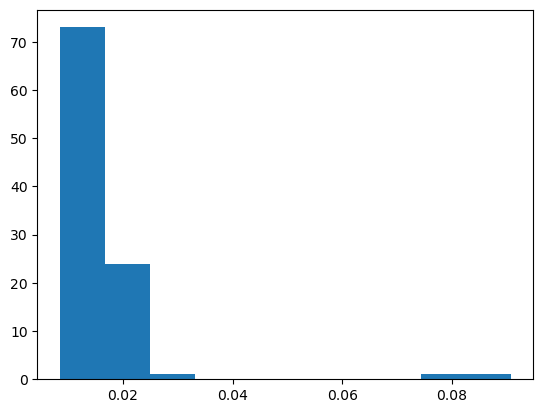

In [31]:
import matplotlib.pyplot as plt

plt.hist(master_orbit_elements[:,1])
plt.plot()

In [37]:
print(best_RA_vec)
print(best_DEC_vec)

[3.90922046 3.91146248 3.91366596]
[-0.23380237 -0.22825658 -0.22495064]


In [40]:
temp_ra_vec = np.array([3.90922051, 3.91146256, 3.91366604])
temp_dec_vec = np.array([-0.23369376, -0.22826805, -0.22492064])


In [42]:
print(temp_ra_vec)
print(temp_dec_vec)

[3.90922051 3.91146256 3.91366604]
[-0.23369376 -0.22826805 -0.22492064]


In [41]:
print(best_times)
print(sun_vectors)

[2460497.672 2460500.689 2460502.663]
[[-0.2503979   0.90411311  0.39192517]
 [-0.29953637  0.8914005   0.38641394]
 [-0.33127394  0.88184012  0.38226878]]


In [26]:
print(helper.dec_dms_to_deg(-2, 46, 44.3)*np.pi/180)

-0.0485022150992413


In [2]:
import numpy as np
import helper_od_yuan as helper
import od_lib_yuan as od
from itertools import combinations
from astropy.io import fits
import csv

In [3]:
other_times = np.array([2460118.708333333, 2460125.708333333, 2460132.708333333])
other_sun_vectors = np.array([
    [-2.112490042442325E-02, 9.323243076024456E-01, 4.041173475275137E-01],
    [-1.391482133320911E-01, 9.239895929637317E-01, 4.005002424542735E-01],
    [-2.552179930127938E-01, 9.029675065304688E-01, 3.913862959375257E-01]
])

other_ra_vec = np.array([helper.ra_to_deg(15, 48, 6.22), helper.ra_to_deg(15, 50, 18.27), helper.ra_to_deg(15, 57, 23.59)])
other_dec_vec = np.array([helper.dec_dms_to_deg(-2, 46, 44.3), helper.dec_dms_to_deg(1, 12, 55.0), helper.dec_dms_to_deg(6, 7, 24.6)])*np.pi/180



a910lc_vecs = od.GaussMethod(other_ra_vec, other_dec_vec, other_times, other_sun_vectors)
position_vec, velocity_vec = a910lc_vecs.get_position_and_velocity(use_ecliptic = True)

print(position_vec, velocity_vec)

# a910lc_od = od.OrbitalDetermination(position_vec, velocity_vec, temp_times[1])
# a910lc_elements = a910lc_od.get_orbital_elements(use_radians = False)
# print(a910lc_elements)

[[-0.54361957 -0.83793027 -0.0484832 ]
 [-0.53605797 -0.8439147   0.02120901]
 [-0.50690913 -0.85537374  0.10667189]]
[-0.06786346 -1.24988754 -0.39230987] [1.31385299 0.54593471 0.28796442]
[-0.02569798 -1.18350654 -0.39397814] [1.24446052 0.45892273 0.23980518]
[-0.00246306 -1.14692786 -0.39489743] [1.20627269 0.41109803 0.21334557]
[ 0.01219519 -1.12385142 -0.39547738] [1.18218343 0.38096742 0.19667605]
[ 0.02220023 -1.1081005  -0.39587322] [1.16574207 0.36041868 0.18530828]
[ 0.02938827 -1.09678439 -0.39615762] [1.15393028 0.3456638  0.17714618]
[ 0.03474003 -1.08835913 -0.39636936] [1.14513615 0.33468259 0.17107189]
[ 0.03882949 -1.08192111 -0.39653116] [1.13841635 0.32629392 0.16643186]
[ 0.04201602 -1.07690457 -0.39665723] [1.1331803  0.31975888 0.16281725]
[ 0.04453658 -1.07293644 -0.39675696] [1.12903858 0.3145905  0.15995863]
[ 0.04655399 -1.06976044 -0.39683677] [1.12572365 0.31045439 0.15767101]
[ 0.04818386 -1.06719454 -0.39690126] [1.12304552 0.30711318 0.15582307]
[ 0.04

In [1]:
import numpy as np
import helper_od_yuan as helper
import od_lib_yuan as od
from itertools import combinations
from astropy.io import fits
import csv

In [2]:
other_times = np.array([2460497.672, 2460500.689, 2460502.663])
other_sun_vectors = np.array([[-0.2503979,   0.90411311,  0.39192517],
 [-0.29953637,  0.8914005,   0.38641394],
 [-0.33127394,  0.88184012,  0.38226878]]
)

other_ra_vec = np.array([3.90922051, 3.91146256, 3.91366604])
other_dec_vec = np.array([-0.23369376, -0.22826805, -0.22492064])



a910lc_vecs = od.GaussMethod(other_ra_vec, other_dec_vec, other_times, other_sun_vectors)
position_vec, velocity_vec = a910lc_vecs.get_position_and_velocity(use_ecliptic = True)

print(position_vec, velocity_vec)

# a910lc_od = od.OrbitalDetermination(position_vec, velocity_vec, other_times[1])
# a910lc_elements = a910lc_od.get_orbital_elements(use_radians = False)
# print(a910lc_elements)

[[-0.70000066 -0.67555405 -0.23157245]
 [-0.69937612 -0.67798636 -0.22629084]
 [-0.69841929 -0.68005041 -0.223029  ]]
[[-0.70000066 -0.67555405 -0.23157245]
 [-0.69937612 -0.67798636 -0.22629084]
 [-0.69841929 -0.68005041 -0.223029  ]]
[-0.77611407 -1.93415319 -0.73445248] [1.09109171 0.29659399 0.30527362]
[-0.75889295 -1.91745876 -0.7288804 ] [1.08876923 0.2962284  0.30227055]
[-0.7553841  -1.91405723 -0.72774507] [1.08829286 0.29614805 0.30165747]
[-0.75465223 -1.91334774 -0.72750827] [1.0881935  0.29613129 0.3015296 ]
[-0.75449884 -1.91319904 -0.72745864] [1.08817267 0.29612777 0.3015028 ]
[-0.75446666 -1.91316784 -0.72744822] [1.0881683  0.29612704 0.30149717]
[-0.75445991 -1.9131613  -0.72744604] [1.08816739 0.29612688 0.30149599]
[-0.75445849 -1.91315992 -0.72744558] [1.08816719 0.29612685 0.30149575]
[-0.75445819 -1.91315964 -0.72744548] [1.08816715 0.29612684 0.30149569]
[-0.75445813 -1.91315958 -0.72744546] [1.08816715 0.29612684 0.30149568]
[-0.75445812 -1.91315956 -0.727445

In [23]:

temp_ra_vec = np.array([3.90922051, 3.91146256, 3.91366604])
temp_dec_vec = np.array([-0.23369376, -0.22826805, -0.22492064])

# [3.90922046 3.91146248 3.91366596]
# [-0.23380237 -0.22825658 -0.22495064]


a910lc_vecs = od.GaussMethod(temp_RA_vec, temp_DEC_vec, temp_times, sun_vectors)
position_vec, velocity_vec = a910lc_vecs.get_position_and_velocity(use_ecliptic = True)

print(position_vec, velocity_vec)

# a910lc_od = od.OrbitalDetermination(position_vec, velocity_vec, temp_times[1])
# a910lc_elements = a910lc_od.get_orbital_elements(use_radians = False)
# print(a910lc_elements)

[[-0.69999864 -0.67555214 -0.23158414]
 [-0.69936368 -0.67797434 -0.22636528]
 [-0.69841506 -0.68004596 -0.22305581]]
[-0.83208386 -2.12373749  0.10029574] [1.39589216 0.70173731 0.1447701 ]


In [31]:
print(master_orbit_elements)

[[1.32855728e+00 5.65745236e-01 2.21411611e+01 2.47560143e+02
  2.05928420e+02 1.23714140e+02 2.46030847e+06]
 [1.52959608e+00 9.13051671e-01 3.89989766e+01 2.52749677e+02
  2.03310865e+02 4.96985008e+01 2.46040530e+06]]


In [ ]:
#  [  2.61413629   0.40966366  15.29251437 242.50372317  91.43958501
#  321.06579767]]

In [21]:
def monte_carlo_sim(num_iterations, best_times, best_RA_vec, best_DEC_vec, uncert_ra, uncert_dec):
    sun_vectors = np.array([None])
    
    random_ra_1_vec = np.random.normal(best_RA_vec[0], uncert_ra[0], num_iterations)
    random_ra_2_vec = np.random.normal(best_RA_vec[1], uncert_ra[1], num_iterations)
    random_ra_3_vec = np.random.normal(best_RA_vec[2], uncert_ra[2], num_iterations)
    random_dec_1_vec = np.random.normal(best_DEC_vec[0], uncert_dec[0], num_iterations)
    random_dec_2_vec = np.random.normal(best_DEC_vec[1], uncert_dec[1], num_iterations)
    random_dec_3_vec = np.random.normal(best_DEC_vec[2], uncert_dec[2], num_iterations)
    
    master_orbit_elements = np.zeros((0,7))
    for i in range(num_iterations):
        temp_times = best_times
        temp_RA_vec = np.array([random_ra_1_vec[i], random_ra_2_vec[i], random_ra_3_vec[i]]).astype(np.float64)
        temp_DEC_vec = np.array([random_dec_1_vec[i], random_dec_2_vec[i], random_dec_3_vec[i]]).astype(np.float64)
        
        print(temp_RA_vec)
        print(temp_DEC_vec)
        
        a910lc_vecs = od.GaussMethod(temp_RA_vec, temp_DEC_vec, temp_times, sun_vectors)
        position_vec, velocity_vec = a910lc_vecs.get_position_and_velocity(use_ecliptic = True)
        
        print(position_vec, velocity_vec)
        
        a910lc_od = od.OrbitalDetermination(position_vec, velocity_vec, temp_times[1])
        a910lc_elements = a910lc_od.get_orbital_elements(use_radians = False)
        # keys = ["a", "e", "i", "Ω", "ω", "M", "T"]
        master_orbit_elements = np.vstack((master_orbit_elements, a910lc_elements))
    
    return master_orbit_elements

In [22]:
print(best_RA_vec)
print(best_DEC_vec)

[3.90922046 3.91146248 3.91366596]
[-0.23380237 -0.22825658 -0.22495064]


In [23]:
master_orbit_elements = monte_carlo_sim(int(5), best_times, best_RA_vec, best_DEC_vec, uncert_ra, uncert_dec)

[3.90926731 3.91137962 3.91374962]
[-0.23391451 -0.2284007  -0.22487393]
[-0.49996997 -1.7854875   0.07077332] [1.50732893 0.82991042 0.08502977]


AssertionError: 

In [39]:
print(best_RA_vec)
print(best_DEC_vec)

[3.90922046 3.91146248 3.91366596]
[-0.23380237 -0.22825658 -0.22495064]


In [40]:
print(master_orbit_elements)

[[-2.03213471e+01  1.08345648e+00  2.87868427e-01  4.17253486e+00
   1.25510617e+00             nan             nan]
 [-1.60101579e-01  8.77676896e+00  1.38455720e-01  3.99410571e+00
   1.41313632e+00             nan             nan]
 [ 1.25447747e+00  2.44676882e-01  1.21043254e-01  4.39804012e+00
   2.54013623e+00  4.37573380e+00  2.46014328e+06]
 [-1.50280932e+01  1.11151919e+00  2.77588244e-01  4.17363626e+00
   1.24835202e+00             nan             nan]
 [-7.83887816e-02  1.81104854e+01  2.21901404e-01  3.97654435e+00
   1.43210618e+00             nan             nan]]
